# Introducción a Pandas

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Graficar inline
%matplotlib inline

### Construcción de Dataframes

In [1]:
# Crear datos

nombres = ['Juan','Pedro','María','Paula','Diego','Andrea','Diana']
edades = [22, 24, 32, 19, 52, 45, 61]

In [2]:
# Crear dataset

personas_dataset = list(zip(nombres,edades)) # La función zip() crea un iterador a partir de dos iteradores
personas_dataset

[('Juan', 22),
 ('Pedro', 24),
 ('María', 32),
 ('Paula', 19),
 ('Diego', 52),
 ('Andrea', 45),
 ('Diana', 61)]

In [7]:
# Crear DATAFRAME

df = pd.DataFrame(data=personas_dataset, columns=["Nombre","Edad"])
df

,Nombre,Edad
0,Juan,22
1,Pedro,24
2,María,32
3,Paula,19
4,Diego,52
5,Andrea,45
6,Diana,61


In [9]:
# Escribir en CSV
# The index allow us to persist the INDEX on the table created above, it is false the index is not going to persist
df.to_csv("./data/personas.csv", index=False)

In [10]:
# Leer de CSV

df_csv = pd.read_csv("./data/personas.csv", encoding = "latin-1")
df_csv

,Nombre,Edad
0,Juan,22
1,Pedro,24
2,MarÃ­a,32
3,Paula,19
4,Diego,52
5,Andrea,45
6,Diana,61


In [11]:
df

,Nombre,Edad
0,Juan,22
1,Pedro,24
2,María,32
3,Paula,19
4,Diego,52
5,Andrea,45
6,Diana,61


### Tipos de datos

In [12]:
# The data types is the ones that we usewhen we create the persistence
df.dtypes

Nombre    object
Edad       int64
dtype: object

### Análisis de datos

In [13]:
# Encontrar la mayor edad
# We order the data by EDAD
df_ordenado = df.sort_values(['Edad'], ascending=False)
df_ordenado.head(1) # Función head(n) trae las primeras n filas del dataframe

,Nombre,Edad
6,Diana,61


In [14]:
# Encontrar la mayor edad (otro método)

df_ordenado['Edad'].max()

61

La persona mayor


,Nombre,Edad
6,Diana,61


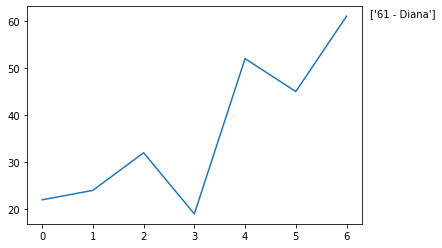

In [15]:
# Crear gráfica
df['Edad'].plot()

# Valor máximo en el dataset
ValorMax = df['Edad'].max()

# Nombre asociado a la máxima edad
NombreMax = df['Nombre'][df['Edad'] == df['Edad'].max()].values

# Texto para mostrar en la gráfica
Texto = str(ValorMax) + " - " + NombreMax

# Añadir texto a la gráfica
plt.annotate(Texto, xy=(1, ValorMax), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("La persona mayor")
df.loc[df['Edad'] == df['Edad'].max()]

### Análisis de datos II

In [16]:
df_got = pd.read_csv("./data/got.csv")
df_got.head() # Print the first lines of the dataset

,name,age,house
0,Walder Frey,97,House Frey
1,Aemma Arryn,23,House Arryn
2,Sylva Santagar,29,House Santagar
3,Valarr Targaryen,26,House Targaryen
4,Willow Heddle,16,Brotherhood Without Banners


<AxesSubplot:>

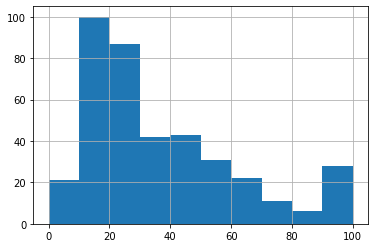

In [17]:
# Histograma de la serie de edad

df_got["age"].hist()

In [19]:
# Valores únicos

df_got["house"].unique()

array(['House Frey', 'House Arryn', 'House Santagar', 'House Targaryen',
       'Brotherhood Without Banners', 'House Manderly', "Night's Watch",
       'House Botley', 'Burned Men', 'House Velaryon', 'House Tyrell',
       'wildling', 'House Brax', 'House Westerling', 'House Lannister',
       'House Greyjoy', 'House Frey of Riverrun', 'House Osgrey',
       'House Hightower', 'House Baelish', 'House Tully',
       'House Karstark', 'House Ironmaker', 'House Uffering',
       'Happy Port', "Chataya's brothel", 'House Martell', 'Second Sons',
       'House Norcross', 'House Haigh', 'House Bulwer', 'House Crakehall',
       'House Butterwell', 'House Celtigar', 'House Tallhart',
       'House Cassel', 'House Rosby', 'House Cerwyn', 'House Swann',
       'House Vypren', 'House Tarly', 'House Waynwood', 'House Bar Emmon',
       'Faith of the Seven', 'House Mooton', 'House Meadows',
       'House Hayford', 'House Glover', 'House Hunter', 'House Strong',
       'House Wagstaff', 'House Goo

<span style="color:red">Reto 1</span>

In [ ]:
df

In [20]:
# Conteo de registros por casa
# Podemos agregar la lista de columnas que queremos agrupar
df_count = df_got.groupby(["house"]).agg(["count"])["name"]
df_count

,count
house,
Blacks,1
Brotherhood Without Banners,2
Brotherhood without banners,1
Burned Men,1
Chataya's brothel,2
...,...
Mance Rayder,1
Night's Watch,13
Second Sons,1


<span style="color:red">Reto 2</span>

In [21]:
df_count.sort_values('count', ascending = False).head(1)

,count
house,
House Frey,82


<span style="color:red">Reto 3</span>

In [22]:
df_count.sort_values('count', ascending = False).head(5)

,count
house,
House Frey,82
House Targaryen,44
House Lannister,18
House Martell,14
House Stark,13


<span style="color:red">Reto 4</span>

In [24]:
df_got.sort_values('age', ascending = False).head(5)

,name,age,house
54,Daena Targaryen,100,House Targaryen
363,Rhae Targaryen,100,House Targaryen
314,Larys Strong,100,House Strong
40,Aegon Targaryen (son of Jaehaerys I),100,House Targaryen
295,Falena Stokeworth,100,House Stokeworth


<span style="color:red">Reto 5</span>

In [28]:
len(df_got.loc[df_got['age'] >= 100])

25

<span style="color:red">Reto 6</span>

In [30]:
df_got.loc[df_got['age'] >= 80].groupby('house').agg('count')['age']

house
Blacks               1
Graces               1
House Arryn          1
House Baelish        1
House Beesbury       1
House Blackwood      1
House Bracken        1
House Butterwell     1
House Caswell        1
House Drumm          1
House Frey           1
House Ironmaker      1
House Lannister      1
House Lothston       1
House Osgrey         2
House Plumm          1
House Stokeworth     1
House Stout          1
House Strong         1
House Swann          1
House Targaryen     11
House Uffering       1
House Webber         1
Name: age, dtype: int64

### Funciones

In [ ]:
# La función apply() permite aplicar una función todos los elementos de una columna
# en este caso todos los datos se van a mostrar en mayúsculas
df_got["name_upper"] = df_got["name"].apply(lambda x:x.upper())
df_got.head(10)

<span style="color:red">Reto 7</span>

In [32]:
df_got['len_name'] = df_got['name'].apply(lambda x: len(x))
df_got.sort_values('len_name', ascending = False).head()

,name,age,house,len_name
51,Daella Targaryen (daughter of Jaehaerys I),28,House Targaryen,42
53,Daenerys Targaryen (daughter of Aegon IV),100,House Targaryen,41
15,Rhaena Targaryen (daughter of Aegon III),100,House Targaryen,40
17,Rhaenys Targaryen (daughter of Rhaegar),3,House Targaryen,39
52,Daella Targaryen (daughter of Maekar I),100,House Targaryen,39


### Conocer los datos

In [ ]:
chipo = pd.read_csv("./data/chipotle.tsv", sep = '\t')

<span style="color:red">Reto 8</span>

<span style="color:red">Reto 9</span>

In [ ]:
# Columnas del dataframe

chipo.columns

<span style="color:red">Reto 10</span>

In [ ]:
# Ver indexación del dataset

chipo.index

<span style="color:red">Reto 11</span>

<span style="color:red">Reto 12</span>

<span style="color:red">Reto 13</span>

<span style="color:red">Reto 14</span>

<span style="color:red">Reto 15</span>

<span style="color:red">Reto 16</span>

<span style="color:red">Reto 17</span>

### Filtrar

In [ ]:
euro = pd.read_csv("./data/euro.csv")
euro.head(5)

In [ ]:
# Filtrar por columnas

disciplina = euro[['Team', 'Yellow Cards', 'Red Cards']]
disciplina.head(5)

In [ ]:
# Ordenar registros primero por tarjetas rojas y luego por tarjetas amarillas

disciplina.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

<span style="color:red">Reto 18</span>

<span style="color:red">Reto 19</span>

<span style="color:red">Reto 20</span>

### Más agrupaciones

In [ ]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [ ]:
regiment = pd.DataFrame(raw_data, columns = raw_data.keys())
regiment

In [ ]:
# Estadísticas generales por compañía

regiment.groupby('company').describe()

In [ ]:
# Media de preTestScores agrupados por regimiento y compañía

regiment.groupby(['regiment', 'company']).preTestScore.mean()

In [ ]:
# Media de preTestScores agrupados por regimiento y compañía 
# sin índice jerárquico

regiment.groupby(['regiment', 'company']).preTestScore.mean().unstack()

### Uniones

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [ ]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])

In [ ]:
data1

In [ ]:
data2

In [ ]:
# Unión de dataframes por filas

all_data = pd.concat([data1, data2])
all_data

In [ ]:
# Unión de dataframes por columnas (inner)

pd.merge(data1, data2, on='subject_id', how='inner')

In [ ]:
# Unión de dataframes por columnas (outer)

pd.merge(data1, data2, on='subject_id', how='outer')